In [3]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Continuing from Yesterday

In [4]:
# As of Jan 2017, this census file is online here: 
data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'

# A copy can be accessed here in case census.gov moves the file:
# data = 'http://inferentialthinking.com/notebooks/nc-est2015-agesex-res.csv'

full_census_table = Table.read_table(data)
us_pop = (full_census_table
          .select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2015')
          .relabeled(2, '2010').relabeled(3, '2015'))
us_pop_2015 = us_pop.drop('2010')
us_pop_2015

SEX,AGE,2015
0,0,3978038
0,1,3968564
0,2,3966583
0,3,3974061
0,4,4020035
0,5,4018158
0,6,4019207
0,7,4148360
0,8,4167887
0,9,4133564


In [7]:
females = us_pop_2015.where('SEX', 2).where('AGE', are.not_equal_to(999))
females

SEX,AGE,2015
2,0,1942904
2,1,1939269
2,2,1939979
2,3,1943417
2,4,1964111
2,5,1967310
2,6,1968544
2,7,2031242
2,8,2039062
2,9,2021886


In [8]:
males = us_pop_2015.where('SEX', 1).where('AGE', are.not_equal_to(999))
males

SEX,AGE,2015
1,0,2035134
1,1,2029295
1,2,2026604
1,3,2030644
1,4,2055924
1,5,2050848
1,6,2050663
1,7,2117118
1,8,2128825
1,9,2111678


In [10]:
females.column('AGE')

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [13]:
ratios = Table().with_columns(
    'AGE', females.column('AGE'),
    '2015 F:M RATIO', females.column('2015') / males.column('2015'),
)
ratios

AGE,2015 F:M RATIO
0,0.954681
1,0.955637
2,0.957256
3,0.957045
4,0.955342
5,0.959267
6,0.959955
7,0.959437
8,0.957834
9,0.957478


In [14]:
ratios.where('AGE', are.above(75))

AGE,2015 F:M RATIO
76,1.22268
77,1.24979
78,1.27447
79,1.30076
80,1.33674
81,1.36432
82,1.40552
83,1.44827
84,1.49756
85,1.55627


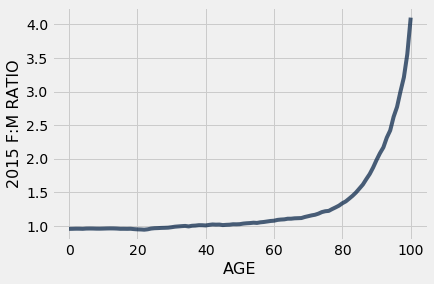

In [15]:
ratios.plot('AGE')

## Visualization

In [16]:
actors = Table.read_table('http://inferentialthinking.com/notebooks/actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


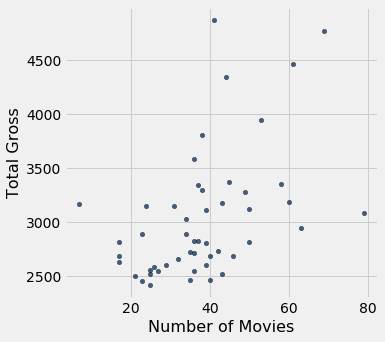

In [18]:
actors.scatter('Number of Movies', 'Total Gross')

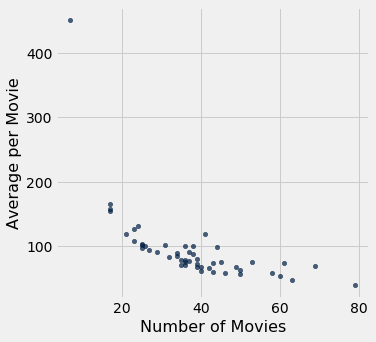

In [19]:
actors.scatter('Number of Movies', 'Average per Movie')

In [20]:
actors.where('Number of Movies', are.below(10))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


In [21]:
actors.where('Number of Movies', are.above(60))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Robert DeNiro,3081.3,79,39,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


In [23]:
movies = Table.read_table('http://inferentialthinking.com/notebooks/movies_by_year.csv')
movies

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


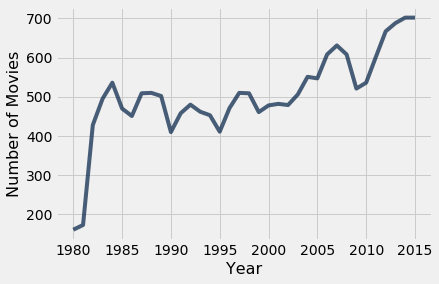

In [24]:
movies.plot('Year', 'Number of Movies')

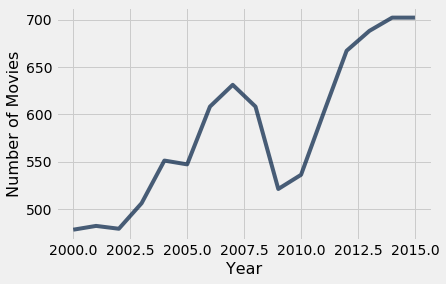

In [25]:
century_21 = movies.where('Year', are.above(1999))
century_21.plot('Year', 'Number of Movies')

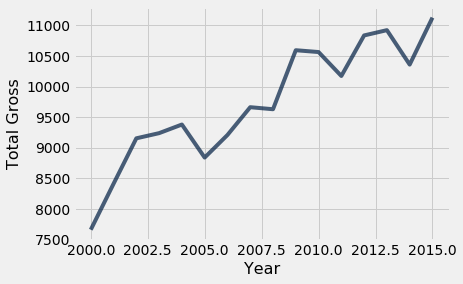

In [26]:
century_21.plot('Year', 'Total Gross')

In [29]:
century_21.where('Year', are.equal_to(2009))

Year,Total Gross,Number of Movies,#1 Movie
2009,10595.5,521,Avatar


## Categorical Data

In [22]:
top = Table.read_table('http://inferentialthinking.com/notebooks/top_movies.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Avatar,Fox,760507625,846120800,2009
Titanic,Paramount,658672302,1178627900,1997
Jurassic World,Universal,652270625,687728000,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
The Dark Knight,Warner Bros.,534858444,647761600,2008
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
Star Wars,Fox,460998007,1549640500,1977
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


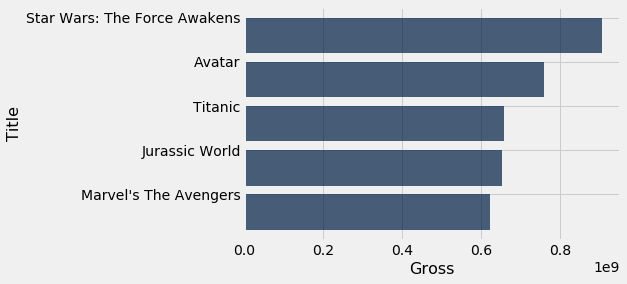

In [34]:
top5 = top.take(np.arange(5))
top5.barh('Title', 'Gross')

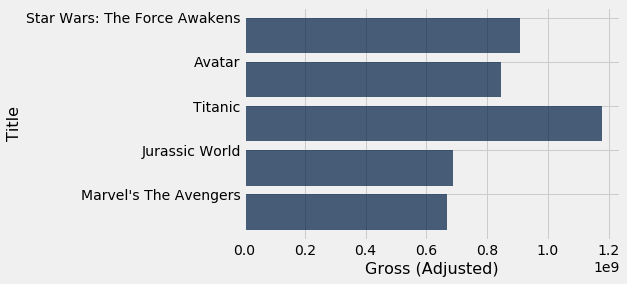

In [35]:
top5.barh('Title', 'Gross (Adjusted)')

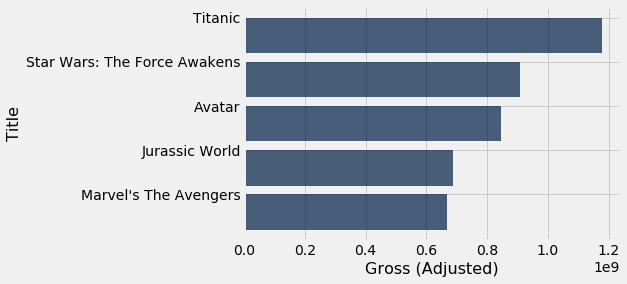

In [40]:
top5.sort(3, descending=True).barh('Title', 'Gross (Adjusted)')

In [37]:
top.sort(3, descending=True).take(np.arange(5))

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1757788200,1939
Star Wars,Fox,460998007,1549640500,1977
The Sound of Music,Fox,158671368,1239013800,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1234132700,1982
Titanic,Paramount,658672302,1178627900,1997


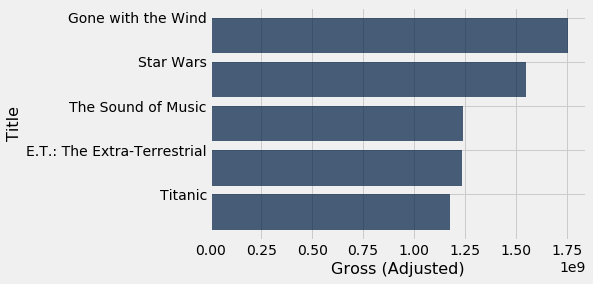

In [39]:
top.sort(3, descending=True).take(np.arange(5)).barh('Title', 3)

In [45]:
top5

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Avatar,Fox,760507625,846120800,2009
Titanic,Paramount,658672302,1178627900,1997
Jurassic World,Universal,652270625,687728000,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012


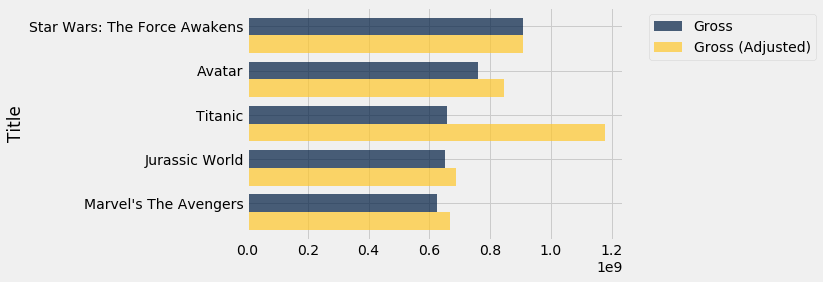

In [43]:
top5.select(0, 2, 3).barh('Title')

In [48]:
studios = top.group('Studio')
studios

Studio,count
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
Fox,26
IFC,1
Lionsgate,3
MGM,7
MPC,1


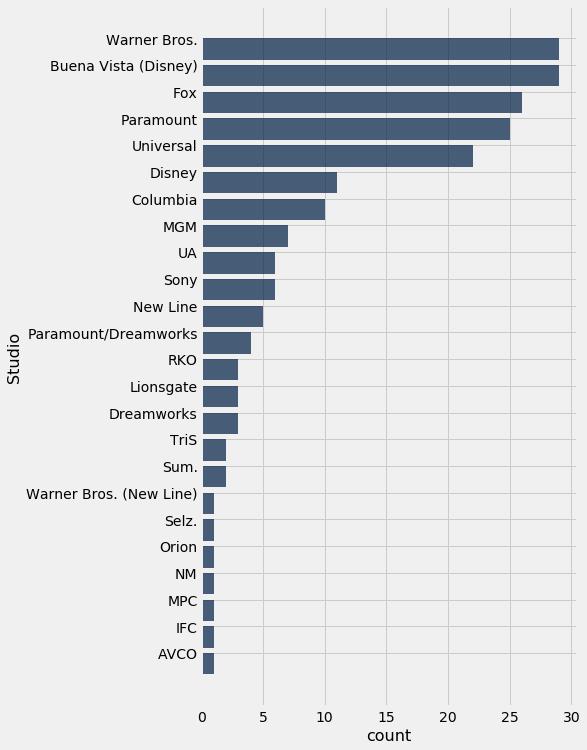

In [49]:
studios.sort('count', descending=True).barh('Studio')